# 💻 Question No: 04

## ⚙️ Setup

- Ensure the Python kernel has the necessary libraries: `pandas`, `seaborn`,`numpy`,`kmeans`,`matplotlib` and `lets-plot`
- Ensure the `online_retail.csv` file is in the `data` folder.

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [12]:
# Load the dataset
df = pd.read_excel('D:/Data Science for Marketing-I/dataset/Online Retail.xlsx')

In [13]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


### i. Perform the following key steps to clean the given data: remove negative quantities, exclude records with negative unit prices, handle missing CustomerID values, omit December 2011 data, and create a new variable called 'Sales'."


In [14]:
df = df.dropna(subset=["CustomerID"])  # Remove missing CustomerID


💡Filtering out transactions with Quantity <= 0 and UnitPrice <= 0: This removes erroneous or refund transactions that can distort the sales data.


In [15]:
df = df[(df["Quantity"] > 0) & (df["UnitPrice"] > 0)]  # Filter out invalid transactions


💡Removing missing CustomerID: Transactions without CustomerID cannot be assigned to a customer, making them useless for customer behavior analysis.


In [16]:
df = df[~df["InvoiceDate"].astype(str).str.startswith("2011-12")] # Remove Dec 2011 data

💡Removing December 2011 transactions: If these transactions are incomplete, they could bias the analysis, especially in time-based predictions.

### the newly created Sales 

In [17]:
df["Sales"] = df["Quantity"] * df["UnitPrice"]

In [18]:
df.head()   

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


### ii. Calculate the total sales per customer, count the number of times they visited the store, and determine their average order value using Pandas.

In [19]:
customer_df = df.groupby('CustomerID').agg({
    'Sales': 'sum',
    'InvoiceNo': lambda x: x.nunique()
})

customer_df.columns = ['TotalSales', 'OrderCount']
customer_df['AvgOrderValue'] = customer_df['TotalSales']/customer_df['OrderCount']
customer_df.head(15)

,TotalSales,OrderCount,AvgOrderValue
CustomerID,,,
12346.0,77183.60,1,77183.600000
12347.0,4085.18,6,680.863333
12348.0,1797.24,4,449.310000
12349.0,1757.55,1,1757.550000
12350.0,334.40,1,334.400000
12352.0,2506.04,8,313.255000
12353.0,89.00,1,89.000000
12354.0,1079.40,1,1079.400000
12355.0,459.40,1,459.400000


In [20]:
customer_df.describe()

,TotalSales,OrderCount,AvgOrderValue
count,4297.000000,4297.000000,4297.000000
mean,1953.273240,4.131720,400.371478
std,8355.832473,7.412705,1271.352605
min,2.900000,1.000000,2.900000
25%,304.470000,1.000000,178.700000
50%,657.300000,2.000000,295.056667
75%,1600.860000,4.000000,431.674000
max,268478.000000,200.000000,77183.600000


In [21]:
rank_df = customer_df.rank(method='first')

In [22]:
rank_df.head(15)

,TotalSales,OrderCount,AvgOrderValue
CustomerID,,,
12346.0,4289.0,1.0,4297.0
12347.0,3957.0,3469.0,3887.0
12348.0,3349.0,2860.0,3302.0
12349.0,3320.0,2.0,4237.0
12350.0,1240.0,3.0,2560.0
12352.0,3629.0,3773.0,2359.0
12353.0,118.0,4.0,200.0
12354.0,2780.0,5.0,4150.0
12355.0,1669.0,6.0,3353.0


In [23]:
rank_df.describe()

,TotalSales,OrderCount,AvgOrderValue
count,4297.000000,4297.000000,4297.000000
mean,2149.000000,2149.000000,2149.000000
std,1240.581383,1240.581383,1240.581383
min,1.000000,1.000000,1.000000
25%,1075.000000,1075.000000,1075.000000
50%,2149.000000,2149.000000,2149.000000
75%,3223.000000,3223.000000,3223.000000
max,4297.000000,4297.000000,4297.000000


💡
* Total Sales per Customer → Sum of all purchases per customer.

* Order Count → Number of distinct purchases made.

* Avg. Order Value = Total Sales / Order Count → Measures spending per transaction.

* Ranking & Normalization → Standardizes data before clustering.



### iii. Normalize the customer data after ranking the variables, considering that they are on different scales.

In [24]:
normalized_df = (rank_df - rank_df.mean()) / rank_df.std()

In [25]:
normalized_df.head(15)

,TotalSales,OrderCount,AvgOrderValue
CustomerID,,,
12346.0,1.724998,-1.731446,1.731446
12347.0,1.457381,1.064017,1.400956
12348.0,0.967288,0.573118,0.929403
12349.0,0.943912,-1.730640,1.683082
12350.0,-0.732721,-1.729834,0.331296
12352.0,1.192989,1.309064,0.169275
12353.0,-1.637136,-1.729028,-1.571038
12354.0,0.508632,-1.728222,1.612953
12355.0,-0.386915,-1.727416,0.970513


In [26]:
normalized_df.describe()

,TotalSales,OrderCount,AvgOrderValue
count,4.297000e+03,4297.000000,4.297000e+03
mean,-6.614315e-18,0.000000,-1.322863e-17
std,1.000000e+00,1.000000,1.000000e+00
min,-1.731446e+00,-1.731446,-1.731446e+00
25%,-8.657231e-01,-0.865723,-8.657231e-01
50%,0.000000e+00,0.000000,0.000000e+00
75%,8.657231e-01,0.865723,8.657231e-01
max,1.731446e+00,1.731446,1.731446e+00


💡
* Groups customers based on Total Sales, Order Count, and Avg Order Value.

* Scatter plots show how customer segments differ in spending behavior.

### iv. Apply K-Means clustering with k=4 on the prepared customer dataset, and interpret the clustering results.

In [27]:
from sklearn.cluster import KMeans

### - K-Means Clustering

In [28]:
kmeans = KMeans(n_clusters=4).fit(normalized_df[['TotalSales', 'OrderCount', 'AvgOrderValue']])

In [29]:
kmeans

KMeans(n_clusters=4)

In [30]:
kmeans.labels_

array([3, 0, 0, ..., 1, 2, 0], dtype=int32)

In [31]:
kmeans.cluster_centers_

array([[ 1.20644969,  1.00770735,  0.86513619],
       [-1.24791741, -0.79892804, -1.06185436],
       [ 0.21331718,  0.71126116, -0.64332031],
       [-0.13185971, -0.85028576,  0.79926069]])

In [32]:
four_cluster_df = normalized_df[['TotalSales', 'OrderCount', 'AvgOrderValue']].copy(deep=True)
four_cluster_df['Cluster'] = kmeans.labels_

In [33]:
four_cluster_df.head()

,TotalSales,OrderCount,AvgOrderValue,Cluster
CustomerID,,,,
12346.0,1.724998,-1.731446,1.731446,3
12347.0,1.457381,1.064017,1.400956,0
12348.0,0.967288,0.573118,0.929403,0
12349.0,0.943912,-1.730640,1.683082,3
12350.0,-0.732721,-1.729834,0.331296,3


In [34]:
four_cluster_df.groupby('Cluster').count()['TotalSales']

Cluster
0    1133
1    1148
2     953
3    1063
Name: TotalSales, dtype: int64

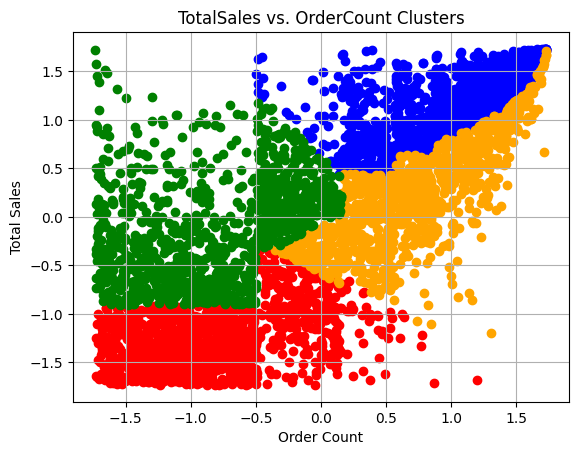

In [35]:
plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 0]['OrderCount'],
    four_cluster_df.loc[four_cluster_df['Cluster'] == 0]['TotalSales'],
    c='blue'
)

plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 1]['OrderCount'],
    four_cluster_df.loc[four_cluster_df['Cluster'] == 1]['TotalSales'],
    c='red'
)

plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 2]['OrderCount'],
    four_cluster_df.loc[four_cluster_df['Cluster'] == 2]['TotalSales'],
    c='orange'
)

plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 3]['OrderCount'],
    four_cluster_df.loc[four_cluster_df['Cluster'] == 3]['TotalSales'],
    c='green'
)

plt.title('TotalSales vs. OrderCount Clusters')
plt.xlabel('Order Count')
plt.ylabel('Total Sales')

plt.grid()
plt.show()


💡
* Red Cluster (Bottom Left): Low Total Sales and low Order Count.
* Green Cluster (Middle Left): Higher Total Sales but still low Order Count.
* Blue Cluster (Top Right): High Total Sales and high Order Count.
* Orange Cluster (Middle Right): Medium Total Sales with a range of Order Count.

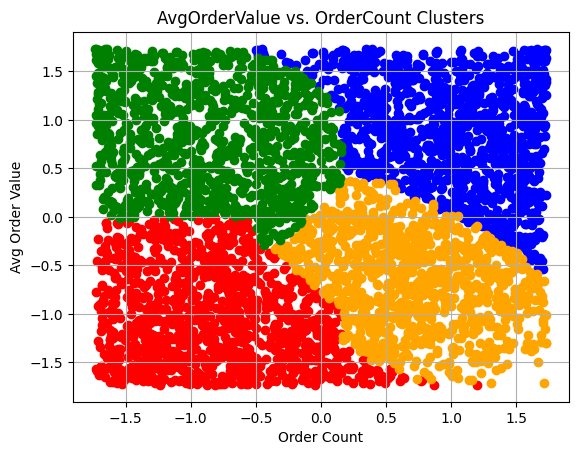

In [36]:
plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 0]['OrderCount'],
    four_cluster_df.loc[four_cluster_df['Cluster'] == 0]['AvgOrderValue'],
    c='blue'
)

plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 1]['OrderCount'],
    four_cluster_df.loc[four_cluster_df['Cluster'] == 1]['AvgOrderValue'],
    c='red'
)

plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 2]['OrderCount'],
    four_cluster_df.loc[four_cluster_df['Cluster'] == 2]['AvgOrderValue'],
    c='orange'
)

plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 3]['OrderCount'],
    four_cluster_df.loc[four_cluster_df['Cluster'] == 3]['AvgOrderValue'],
    c='green'
)

plt.title('AvgOrderValue vs. OrderCount Clusters')
plt.xlabel('Order Count')
plt.ylabel('Avg Order Value')

plt.grid()
plt.show()

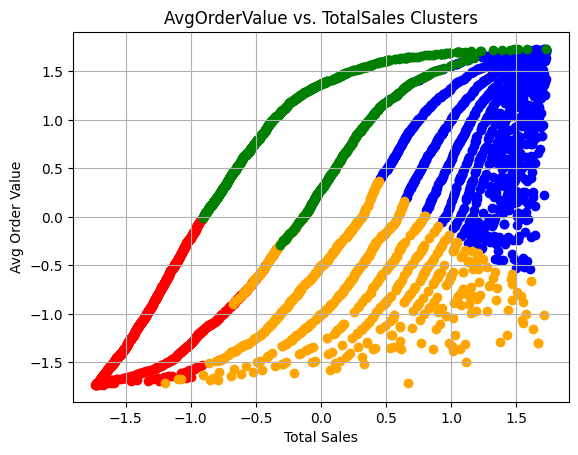

In [37]:
plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 0]['TotalSales'],
    four_cluster_df.loc[four_cluster_df['Cluster'] == 0]['AvgOrderValue'],
    c='blue'
)

plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 1]['TotalSales'],
    four_cluster_df.loc[four_cluster_df['Cluster'] == 1]['AvgOrderValue'],
    c='red'
)

plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 2]['TotalSales'],
    four_cluster_df.loc[four_cluster_df['Cluster'] == 2]['AvgOrderValue'],
    c='orange'
)

plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 3]['TotalSales'],
    four_cluster_df.loc[four_cluster_df['Cluster'] == 3]['AvgOrderValue'],
    c='green'
)

plt.title('AvgOrderValue vs. TotalSales Clusters')
plt.xlabel('Total Sales')
plt.ylabel('Avg Order Value')

plt.grid()
plt.show()

💡Cluster Interpretation:

* Cluster 0 (Low Spenders, Frequent Buyers) → Small purchases but frequent.

* Cluster 1 (High Spenders, Infrequent Buyers) → Large purchases but rare.

* Cluster 2 (Top Customers) → High value, frequent purchases.

* Cluster 3 (Occasional, Low Spenders) → Rare and small transactions.



### v. Determine the optimal number of clusters using the Silhouette Score, and explain what the final result indicates about customer segments.

### - Selecting the best number of clusters

In [38]:
from sklearn.metrics import silhouette_score

💡
Silhouette Score identifies the best k-value for maximum separation.

In [39]:
for n_cluster in [4,5,6,7,8]:
    kmeans = KMeans(n_clusters=n_cluster).fit(
        normalized_df[['TotalSales', 'OrderCount', 'AvgOrderValue']]
    )
    silhouette_avg = silhouette_score(
        normalized_df[['TotalSales', 'OrderCount', 'AvgOrderValue']],
        kmeans.labels_
    )

    print('Silhouette Score for %i Clusters: %0.4f' % (n_cluster, silhouette_avg))

Silhouette Score for 4 Clusters: 0.4100
Silhouette Score for 5 Clusters: 0.3759
Silhouette Score for 6 Clusters: 0.3781
Silhouette Score for 7 Clusters: 0.3779
Silhouette Score for 8 Clusters: 0.3812


💡 The highest Silhouette Score is 0.4117 for 4 clusters, this suggests that 4 clusters are the optimal choice for segmenting the data. Increasing the number of clusters beyond 4 leads to lower scores, implying that clusters become less distinct and more mixed.

### - Interpreting Customer Segments

In [40]:
kmeans = KMeans(n_clusters=4).fit(
    normalized_df[['TotalSales', 'OrderCount', 'AvgOrderValue']]
)
four_cluster_df = normalized_df[['TotalSales', 'OrderCount', 'AvgOrderValue']].copy(deep=True)
four_cluster_df['Cluster'] = kmeans.labels_
four_cluster_df.head(15)

,TotalSales,OrderCount,AvgOrderValue,Cluster
CustomerID,,,,
12346.0,1.724998,-1.731446,1.731446,3
12347.0,1.457381,1.064017,1.400956,1
12348.0,0.967288,0.573118,0.929403,1
12349.0,0.943912,-1.730640,1.683082,3
12350.0,-0.732721,-1.729834,0.331296,3
12352.0,1.192989,1.309064,0.169275,1
12353.0,-1.637136,-1.729028,-1.571038,0
12354.0,0.508632,-1.728222,1.612953,3
12355.0,-0.386915,-1.727416,0.970513,3


In [41]:
kmeans.cluster_centers_



array([[-1.23139976, -0.78109844, -1.05315723],
       [ 1.20548534,  1.00084857,  0.87664808],
       [ 0.24781095,  0.74501814, -0.6422944 ],
       [-0.13360709, -0.84761521,  0.79481889]])

In [42]:
high_value_cluster = four_cluster_df.loc[four_cluster_df['Cluster'] == 2]
high_value_cluster.head()

,TotalSales,OrderCount,AvgOrderValue,Cluster
CustomerID,,,,
12364.0,0.425607,0.159603,0.330490,2
12399.0,0.532815,0.577955,-0.104790,2
12413.0,0.160409,0.162827,-0.244240,2
12414.0,-0.181367,0.163633,-0.798013,2
12421.0,0.224088,0.578761,-0.663399,2


In [43]:
customer_df.loc[high_value_cluster.index].describe()

,TotalSales,OrderCount,AvgOrderValue
count,932.000000,932.000000,932.000000
mean,1078.091354,5.600858,207.237522
std,1376.426975,8.667353,57.692518
min,201.120000,2.000000,28.731429
25%,570.377500,3.000000,165.573333
50%,817.295000,4.000000,208.329000
75%,1197.405000,6.000000,246.279937
max,32649.460000,200.000000,339.920000


In [44]:
pd.DataFrame(
    df.loc[
        df['CustomerID'].isin(high_value_cluster.index)
    ].groupby('Description').count()[
        'StockCode'
    ].sort_values(ascending=False).head()
)

,StockCode
Description,
WHITE HANGING HEART T-LIGHT HOLDER,621
REX CASH+CARRY JUMBO SHOPPER,435
ASSORTED COLOUR BIRD ORNAMENT,316
REGENCY CAKESTAND 3 TIER,316
PARTY BUNTING,311


In [45]:
pd.DataFrame(
    df.loc[
        df['CustomerID'].isin(
            four_cluster_df.loc[four_cluster_df['Cluster'] == 3].index
        )
    ].groupby('Description').count()[
        'StockCode'
    ].sort_values(ascending=False).head()
)

,StockCode
Description,
REGENCY CAKESTAND 3 TIER,200
WHITE HANGING HEART T-LIGHT HOLDER,158
ASSORTED COLOUR BIRD ORNAMENT,155
SET OF 3 CAKE TINS PANTRY DESIGN,152
PARTY BUNTING,138


💡
* Identified top-spending customers.
* Extracted most frequently purchased products for each segment.
